In [27]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import math

In [28]:
df =pd.read_csv('EscherichiaColiK12_binary_hq.txt',sep='\t',usecols=['Uniprot_A','Uniprot_B'])

In [29]:
df

,Uniprot_A,Uniprot_B
0,A0A024FRL9,A0A024FRL9
1,A0A024L327,A0A024L327
2,A0A024LB08,P04993
3,A0A024LB08,P07648
4,A0A066Q5Q8,A0A066Q5Q8
...,...,...
2003,Q9L5C8,Q9L5C8
2004,Q9RPJ3,Q9RPJ3
2005,Q9X2V7,Q9X2V7
2006,Q9X2W0,Q9X2W0


In [30]:
G=nx.from_pandas_edgelist(df,'Uniprot_A','Uniprot_B',create_using=nx.DiGraph())

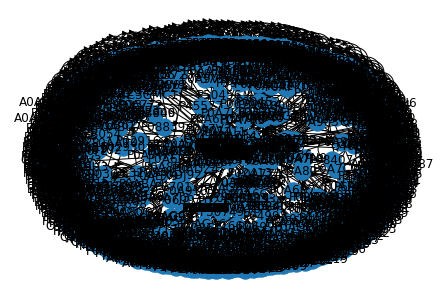

In [31]:
nx.draw(G,with_labels=True)

In [32]:
# visualize to each protein and its degree
degrees=dict(G.degree)
order=sorted(degrees.items(),key=lambda t :t[1])

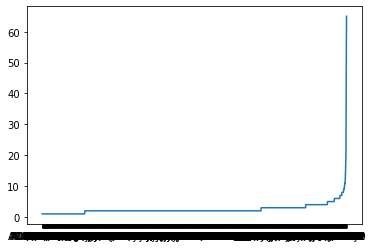

In [33]:
x,y=zip(*order)
plt.plot(x,y)
plt.show()

<BarContainer object of 65 artists>

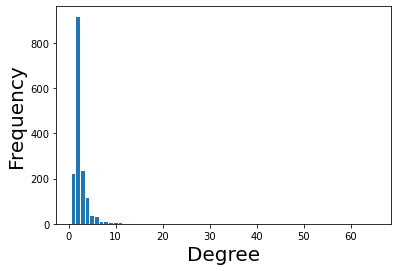

In [34]:
# frequency for Degrees of proteins
degree_sequence = [G.degree(n) for n in G.nodes]
degree_counts = Counter(degree_sequence)
min_degree, max_degree = min(degree_counts.keys()), max(degree_counts.keys())
plt.xlabel("Degree", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
plot_x = list(range(min_degree, max_degree + 1))
plot_y = [degree_counts.get(x, 0) for x in plot_x]
plt.bar(plot_x, plot_y)

In [35]:
# Degree Distribution to know hubs (little proteins have high Degree)

def plot_degree_dist(G):
    
    degrees = G.degree()
    degrees = dict(degrees)
    values = sorted(set(degrees.values()))
   
    histo = [list(degrees.values()).count(x) for x in values]
    P_k = [x / G.order() for x in histo]
   
    
    plt.figure()
    plt.bar(values, P_k)
    plt.xlabel("k",fontsize=20)
    plt.ylabel("p(k)", fontsize=20)
    plt.title("Degree Distribution", fontsize=20)
    
    plt.show()
    plt.figure()
    plt.grid(False)
    plt.loglog(values, P_k, "b+")
    plt.xlabel("k", fontsize=20)
    plt.ylabel("log p(k)", fontsize=20)
    plt.title("log Degree Distribution")
    plt.show()
    plt.show()  

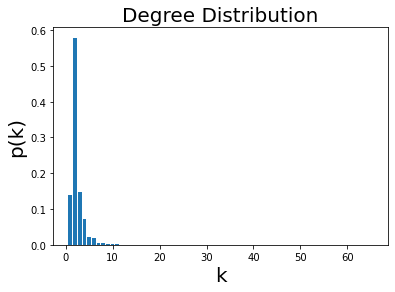

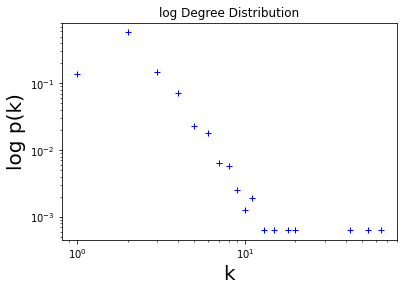

In [36]:
plot_degree_dist(G)

In [37]:
# 5% from sorted degree (hubs)
len(order)*5/100

79.2

In [38]:
hubs=[]
for i in range(len(order)-1,len(order)-80,-1):
    hubs.append(order[i][0])

In [39]:
hubs

['P75679',
 'P0A7J7',
 'Q79E92',
 'P0A8T7',
 'P0A8V2',
 'P39391',
 'P0A7Z4',
 'P0AGA2',
 'P28630',
 'P0A7R5',
 'P0A7V3',
 'P0AFF6',
 'Q46793',
 'P0A940',
 'P37629',
 'P0AD68',
 'P75680',
 'P0A9A6',
 'P77460',
 'P0ADZ0',
 'P0A7S3',
 'P06136',
 'P31697',
 'P10408',
 'P0AA04',
 'P25714',
 'P0ABA0',
 'P0A7W1',
 'P0A7V0',
 'P68699',
 'P69783',
 'P15319',
 'P07363',
 'P29131',
 'P0AGD7',
 'Q46899',
 'P76632',
 'P0ABA6',
 'P0ABB0',
 'P13445',
 'P0AG96',
 'P61175',
 'P0A7V8',
 'P0A7M6',
 'P0A7G6',
 'P0A6A8',
 'P30130',
 'P08191',
 'P08190',
 'P08189',
 'P0ADY7',
 'P0AE67',
 'P0A855',
 'P21513',
 'P68187',
 'P0AEX9',
 'P0A9W3',
 'P00634',
 'P0A9G4',
 'P0A800',
 'P00579',
 'P0AC47',
 'P0A7R9',
 'P03959',
 'Q46901',
 'Q7DFV4',
 'P16687',
 'P16686',
 'P28043',
 'P0AG90',
 'P0AFM6',
 'Q47015',
 'P0ADC3',
 'P0ABB4',
 'P31224',
 'P0AG86',
 'P0A903',
 'P64526',
 'P0AFG0']